In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

# 線形回帰分析
- 基本的な重回帰分析の説明
- ダミー変数
- 重回帰分析の実行
- Formula APIを用いた重回帰分析の実行
- モデルを使用した未来予測
- グラフの作成
- 特徴量エンジニアリング(対数変換、交互作用)
- 正則化項の追加（Lasso回帰、Ridge回帰）

In [2]:
#CSV読み込み
df_sales = pd.read_csv("2-1_sales_sample.csv")

In [3]:
df_sales["雨_ダミー"] = pd.get_dummies(df_sales["雨"])

In [4]:
#Formula APIを使わない方法

#Xとyに分離
X = df_sales[["気温","単価","雨_ダミー"]]
y = df_sales["売上"]

model = sm.OLS(y, sm.add_constant(X))
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     売上   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     55.83
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           8.19e-13
Time:                        17:59:02   Log-Likelihood:                -225.71
No. Observations:                  36   AIC:                             459.4
Df Residuals:                      32   BIC:                             465.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -340.9653    303.596     -1.123      0.270    -959.371     277.440
気温            48.2076      4.818     10.005      0.000      38.393      58.022
単価             1.1667      1.314      0.888      0.381      -1.511       3.844
雨_ダミー        193.0358     77.940      2.477      0.019      34.277     351.794
==============================================================================
Omnibus:                        1.521   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.072
Skew:                          -0.112   Prob(JB):                        0.585
Kurtosis:                       2.185   Cond. No.                     2.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Formula APIを使う方法
model = smf.ols(data=df_sales, formula = "売上 ~ 気温 + 雨_ダミー + 1")

result = model.fit()
result.summary()

#result = model.fit_regularized(L1_wt=1,alpha=0.001)
#result.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     売上   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     83.88
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.15e-13
Time:                        17:59:02   Log-Likelihood:                -226.15
No. Observations:                  36   AIC:                             458.3
Df Residuals:                      33   BIC:                             463.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.2107     98.682     -0.874      0.389    -286.980     114.559
気温            47.6485      4.762     10.007      0.000      37.961      57.336
雨_ダミー        178.0815     75.852      2.348      0.025      23.759     332.404
==============================================================================
Omnibus:                        3.161   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                1.483
Skew:                           0.031   Prob(JB):                        0.476
Kurtosis:                       2.008   Cond. No.                         94.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#予測
df_sales_pred = pd.read_csv("2-1_sales_sample_pred.csv")
result.predict(df_sales_pred)

0    692.242462
1    804.817001
2    399.804427
3    811.363808
4    890.584370
dtype: float64

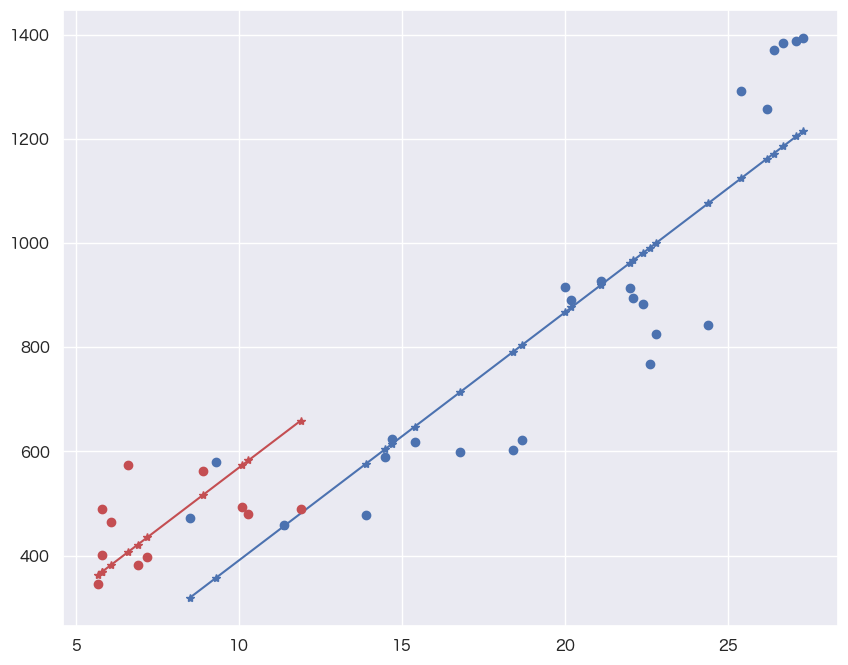

In [7]:
#グラフ作成
sns.set(font="Hiragino Maru Gothic Pro",context="notebook")
plt.figure(figsize=(10,8))

df_sales_sorted = df_sales.sort_values("気温")

df_sales_sorted_0 = df_sales_sorted[df_sales_sorted["雨_ダミー"] == 0]
df_sales_sorted_1 = df_sales_sorted[df_sales_sorted["雨_ダミー"] == 1]

plt.plot(df_sales_sorted_0["気温"],df_sales_sorted_0["売上"],"o",color="b")
plt.plot(df_sales_sorted_0["気温"],result.predict(df_sales_sorted_0[["気温","雨_ダミー"]]),"*-",color="b")

plt.plot(df_sales_sorted_1["気温"],df_sales_sorted_1["売上"],"o",color="r")
plt.plot(df_sales_sorted_1["気温"],result.predict(df_sales_sorted_1[["気温","雨_ダミー"]]),"*-",color="r")


# ロジスティック回帰分析

In [8]:
#CSV読み込み
df_user = pd.read_csv("2-1_user_sample.csv")

In [9]:
X = df_user[["性別","学生","滞在時間"]]
y = df_user["登録"]

model = sm.Logit(y, sm.add_constant(X))
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     登録   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Dec 2024   Pseudo R-squ.:                  0.2588
Time:                        17:59:03   Log-Likelihood:                -19.615
converged:                       True   LL-Null:                       -26.463
Covariance Type:            nonrobust   LLR p-value:                  0.003350
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2982      1.555     -2.764      0.006      -7.346      -1.250
性別             0.5251      0.842      0.624      0.533      -1.124       2.174
学生             2.0147      0.841      2.396      0.017       0.367       3.663
滞在時間           0.0390      0.019      2.087      0.037       0.002       0.076
==============================================================================
"""

In [10]:
#Formula APIを使う方法
model = smf.glm(data=df_user, formula = "登録 ~ 性別 + 学生 + 滞在時間 + 1" ,family = sm.families.Binomial())

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     登録   No. Observations:                   40
Model:                            GLM   Df Residuals:                       36
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.615
Date:                Wed, 25 Dec 2024   Deviance:                       39.229
Time:                        17:59:03   Pearson chi2:                     35.8
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2899
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2982      1.555     -2.764      0.006      -7.346      -1.250
性別             0.5251      0.842      0.624      0.533      -1.124       2.174
学生             2.0147      0.841      2.396      0.017       0.367       3.663
滞在時間           0.0390      0.019      2.087      0.037       0.002       0.076
==============================================================================
"""

In [11]:
df_user_pred = pd.read_csv("2-1_user_sample_pred.csv")
result.predict(df_user_pred)

0    0.581287
1    0.235077
2    0.045979
3    0.786263
4    0.604531
5    0.065309
6    0.382669
7    0.782778
8    0.434141
9    0.571771
dtype: float64

# ポアソン回帰分析

In [12]:
#CSV読み込み
df_contract = pd.read_csv("2-1_contract_sample.csv")

In [13]:
#Formula APIを使わない方法
X = df_contract[["訪問回数","メール送信"]]
y = df_contract["成約数"]

model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    成約数   No. Observations:                   52
Model:                            GLM   Df Residuals:                       50
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.907
Date:                Wed, 25 Dec 2024   Deviance:                       44.273
Time:                        17:59:03   Pearson chi2:                     35.1
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3432
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
訪問回数          -0.0059      0.004     -1.319      0.187      -0.015       0.003
メール送信          1.0778      0.250      4.310      0.000       0.588       1.568
==============================================================================
"""

In [14]:
#Formula APIを使う方法
model = smf.glm(data=df_contract, formula = "成約数 ~ 訪問回数 + メール送信 + 1", family = sm.families.Poisson())

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    成約数   No. Observations:                   52
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.097
Date:                Wed, 25 Dec 2024   Deviance:                       36.652
Time:                        17:59:03   Pearson chi2:                     31.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4327
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5568      0.581     -2.679      0.007      -2.696      -0.418
訪問回数           0.0256      0.012      2.067      0.039       0.001       0.050
メール送信          1.1671      0.276      4.228      0.000       0.626       1.708
==============================================================================
"""

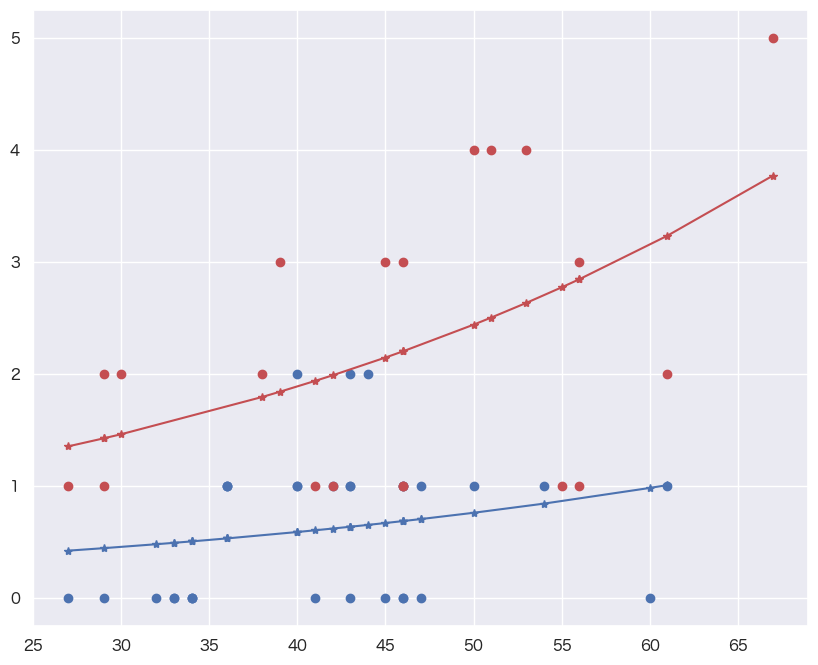

In [15]:
#フィット具合の確認
sns.set(font="Hiragino Maru Gothic Pro",context="notebook")
plt.figure(figsize=(10,8))

df_contract_sorted = df_contract.sort_values("訪問回数")

df_contract_sorted_0 = df_contract_sorted[df_contract_sorted["メール送信"] == 0]
df_contract_sorted_1 = df_contract_sorted[df_contract_sorted["メール送信"] == 1]

plt.plot(df_contract_sorted_0["訪問回数"],df_contract_sorted_0["成約数"],"o",color="b")
plt.plot(df_contract_sorted_0["訪問回数"],result.predict(df_contract_sorted_0),"*-",color="b")

plt.plot(df_contract_sorted_1["訪問回数"],df_contract_sorted_1["成約数"],"o",color="r")
plt.plot(df_contract_sorted_1["訪問回数"],result.predict(df_contract_sorted_1),"*-",color="r")